In [1]:
#패키지 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import warnings

%matplotlib inline



warnings.simplefilter(action = 'ignore', category = FutureWarning) #FutureWarning 팝업 방지

#시각화 시 한글 깨짐 방지 및 마이너스 표시 오류 방지
if os.name == 'nt':
    font_family = 'NanumGothic'
else:
    font_family = 'AppleGothic'
    
sns.set(font = font_family, rc = {'axes.unicode_minus' : False}, font_scale = 3) 

#데이터프레임 내 지수 표현 제거 및 소수점 둘째자리까지 표시
pd.options.display.float_format = '{:.2f}'.format 

#현 경로를 파라미터로 지정
SRC_PATH = os.path.join(os.getcwd(), "out") 


#데이터 정의(data_name)
KT_LIVING = "생활인구"
KT_IN_FLOW = "동단위유입인구"
KT_OUT_FLOW = "동단위유출인구"
KT_LIVING_YEAR = "생활인구_연도별"
KT_IN_FLOW_YEAR = "동단위유입인구_연도별"
KT_OUT_FLOW_YEAR = "동단위유출인구_연도별"

#성별, 연도 컬럼
AGE_LIST = ['남10대','남20대','남30대','남40대','남50대','남60대','남70대',
            '여10대','여20대','여30대','여40대','여50대','여60대','여70대',]

YEARS_LIST = [2018, 2019, 2020, 2021, 2022]


In [2]:
#연도별 데이터프레임을 하나로 통합
df_combine_in = pd.DataFrame()

for path in glob.glob(SRC_PATH+'\\'+KT_IN_FLOW_YEAR+'\\**'):                                               
    df = pd.read_csv(path)
    df_combine_in = pd.concat([df_combine_in,df])
    
#날짜 컬럼들의 타입들을 datetime으로 변경
df_combine_in['일자'] = pd.to_datetime(df_combine_in['일자'])
df_combine_in['연'] = df_combine_in['일자'].dt.year
df_combine_in['월'] = df_combine_in['일자'].dt.month
df_combine_in['연월'] = df_combine_in['일자'].dt.to_period('M')

In [3]:
#연도별 데이터프레임을 하나로 통합
df_combine_out = pd.DataFrame()

for path in glob.glob(SRC_PATH+'\\'+KT_OUT_FLOW_YEAR+'\\**'):                                               
    df = pd.read_csv(path)
    df_combine_out = pd.concat([df_combine_out,df])
    
#날짜 컬럼들의 타입들을 datetime으로 변경
df_combine_out['일자'] = pd.to_datetime(df_combine_out['일자'])
df_combine_out['연'] = df_combine_out['일자'].dt.year
df_combine_out['월'] = df_combine_out['일자'].dt.month
df_combine_out['연월'] = df_combine_out['일자'].dt.to_period('M')

In [4]:
display(df_combine_in.head())
display(df_combine_in.tail())
display(df_combine_out.head())
display(df_combine_out.tail())

,일자,연,월,연월,시군구,존재지역(읍면동),지역_상세,거주지역,남10대,남20대,...,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계
0,2018-01-01,2018,1,2018-01,거제시,거제면,거제시 거제면,강원도,0.00,0.00,...,13.57,0.00,0.00,0.00,0.00,3.56,19.08,11.44,8.62,63.27
1,2018-01-01,2018,1,2018-01,거제시,거제면,거제시 거제면,거제시,1186.98,517.91,...,1431.72,583.70,919.77,547.83,1051.18,1618.44,1705.84,1075.22,580.70,16059.83
2,2018-01-01,2018,1,2018-01,거제시,거제면,거제시 거제면,거창군,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,7.12,3.90,0.00,0.00,18.21
3,2018-01-01,2018,1,2018-01,거제시,거제면,거제시 거제면,결측치,187.36,224.95,...,150.46,54.64,121.92,125.97,133.57,208.86,159.17,139.78,44.17,2354.07
4,2018-01-01,2018,1,2018-01,거제시,거제면,거제시 거제면,경기도,26.50,17.07,...,44.58,29.77,13.23,27.08,46.48,60.75,90.99,68.65,8.62,666.73


,일자,연,월,연월,시군구,존재지역(읍면동),지역_상세,거주지역,남10대,남20대,...,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계
1668614,2022-05-31,2022,5,2022-05,합천군,합천읍,합천군 합천읍,통영시,0.00,0.00,...,7.05,4.17,0.00,0.00,0.00,3.61,9.65,8.36,0.00,49.64
1668615,2022-05-31,2022,5,2022-05,합천군,합천읍,합천군 합천읍,하동군,0.00,0.00,...,0.00,8.35,0.00,0.00,0.00,0.00,0.00,0.00,4.91,27.01
1668616,2022-05-31,2022,5,2022-05,합천군,합천읍,합천군 합천읍,함안군,8.90,3.33,...,3.45,0.00,0.00,0.00,0.00,0.00,6.43,0.00,0.00,48.20
1668617,2022-05-31,2022,5,2022-05,합천군,합천읍,합천군 합천읍,함양군,0.00,8.84,...,0.00,0.00,0.00,0.00,0.00,3.76,3.22,8.65,0.00,51.70
1668618,2022-05-31,2022,5,2022-05,합천군,합천읍,합천군 합천읍,합천군,1072.81,741.66,...,2300.61,1034.20,890.06,647.91,794.04,1482.32,2246.51,1992.43,1186.75,19271.16


,일자,연,월,연월,시군구,거주지역(읍면동),지역_상세,존재지역,남10대,남20대,...,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계
0,2018-01-01,2018,1,2018-01,거제시,거제면,거제시 거제면,강원도,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.78
1,2018-01-01,2018,1,2018-01,거제시,거제면,거제시 거제면,거제시,555.32,247.91,...,701.61,411.09,482.45,279.55,491.88,722.71,827.54,673.61,400.22,7919.64
2,2018-01-01,2018,1,2018-01,거제시,거제면,거제시 거제면,거창군,0.00,6.34,...,9.33,0.00,0.00,0.00,0.00,3.74,4.10,5.66,0.00,29.16
3,2018-01-01,2018,1,2018-01,거제시,거제면,거제시 거제면,결측치,5.94,16.72,...,41.40,31.93,29.48,15.08,17.69,44.14,61.92,38.27,0.00,467.04
4,2018-01-01,2018,1,2018-01,거제시,거제면,거제시 거제면,경기도,4.34,0.00,...,8.73,0.00,9.31,9.04,6.95,3.59,3.52,11.18,0.00,74.93


,일자,연,월,연월,시군구,거주지역(읍면동),지역_상세,존재지역,남10대,남20대,...,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계
1499627,2022-05-31,2022,5,2022-05,합천군,합천읍,합천군 합천읍,통영시,0.00,2.72,...,17.16,0.00,0.00,0.00,0.00,0.00,0.00,3.81,5.53,35.66
1499628,2022-05-31,2022,5,2022-05,합천군,합천읍,합천군 합천읍,하동군,0.00,0.00,...,3.50,0.00,0.00,0.00,6.72,0.00,0.00,0.00,0.00,27.12
1499629,2022-05-31,2022,5,2022-05,합천군,합천읍,합천군 합천읍,함안군,13.26,19.14,...,27.08,4.51,0.00,0.00,6.52,7.26,19.30,7.87,14.73,155.69
1499630,2022-05-31,2022,5,2022-05,합천군,합천읍,합천군 합천읍,함양군,0.00,5.44,...,6.86,0.00,0.00,2.77,7.32,3.85,3.40,3.91,0.00,49.67
1499631,2022-05-31,2022,5,2022-05,합천군,합천읍,합천군 합천읍,합천군,862.64,563.99,...,1532.95,713.79,747.39,553.09,613.86,1207.27,1690.65,1402.05,872.81,14371.63


#창원시 구들을 창원시 하나로 통합
df_combine_in.replace({'시군구' : ['창원시 마산합포구','창원시 마산회원구','창원시 의창구','창원시 성산구','창원시 진해구']}, '창원시', inplace = True)
df_combine_out.replace({'시군구' : ['창원시 마산합포구','창원시 마산회원구','창원시 의창구','창원시 성산구','창원시 진해구']}, '창원시', inplace = True)

df_combine_in = df_combine_in.groupby(['일자','연','월','연월','시군구','존재지역(읍면동)','지역_상세','거주지역']).sum().reset_index()
df_combine_out = df_combine_out.groupby(['일자','연','월','연월','시군구','거주지역(읍면동)','지역_상세','존재지역']).sum().reset_index()

In [5]:
display(df_combine_in.columns)
display(df_combine_out.columns)

Index(['일자', '연', '월', '연월', '시군구', '존재지역(읍면동)', '지역_상세', '거주지역', '남10대',
       '남20대', '남30대', '남40대', '남50대', '남60대', '남70대', '여10대', '여20대', '여30대',
       '여40대', '여50대', '여60대', '여70대', '합계'],
      dtype='object')

Index(['일자', '연', '월', '연월', '시군구', '거주지역(읍면동)', '지역_상세', '존재지역', '남10대',
       '남20대', '남30대', '남40대', '남50대', '남60대', '남70대', '여10대', '여20대', '여30대',
       '여40대', '여50대', '여60대', '여70대', '합계'],
      dtype='object')

In [6]:
display(df_combine_in.head())

,일자,연,월,연월,시군구,존재지역(읍면동),지역_상세,거주지역,남10대,남20대,...,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계
0,2018-01-01,2018,1,2018-01,거제시,거제면,거제시 거제면,강원도,0.00,0.00,...,13.57,0.00,0.00,0.00,0.00,3.56,19.08,11.44,8.62,63.27
1,2018-01-01,2018,1,2018-01,거제시,거제면,거제시 거제면,거제시,1186.98,517.91,...,1431.72,583.70,919.77,547.83,1051.18,1618.44,1705.84,1075.22,580.70,16059.83
2,2018-01-01,2018,1,2018-01,거제시,거제면,거제시 거제면,거창군,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,7.12,3.90,0.00,0.00,18.21
3,2018-01-01,2018,1,2018-01,거제시,거제면,거제시 거제면,결측치,187.36,224.95,...,150.46,54.64,121.92,125.97,133.57,208.86,159.17,139.78,44.17,2354.07
4,2018-01-01,2018,1,2018-01,거제시,거제면,거제시 거제면,경기도,26.50,17.07,...,44.58,29.77,13.23,27.08,46.48,60.75,90.99,68.65,8.62,666.73


In [7]:
#시군구별 일일 유출입인구 평균
 
 #시군구별 일 합계
df_combine_in_groupby_day_1 = df_combine_in.groupby(['일자','시군구']).sum().reset_index().sort_values(by = '일자')
df_combine_out_groupby_day_1 = df_combine_out.groupby(['일자','시군구']).sum().reset_index().sort_values(by = '일자')

df_combine_in_groupby_day_1['연'] = df_combine_in_groupby_day_1['일자'].dt.year
df_combine_in_groupby_day_1['월'] = df_combine_in_groupby_day_1['일자'].dt.month
df_combine_in_groupby_day_1['연월'] = df_combine_in_groupby_day_1['일자'].dt.to_period('M')
df_combine_out_groupby_day_1['연'] = df_combine_out_groupby_day_1['일자'].dt.year
df_combine_out_groupby_day_1['월'] = df_combine_out_groupby_day_1['일자'].dt.month
df_combine_out_groupby_day_1['연월'] = df_combine_out_groupby_day_1['일자'].dt.to_period('M')

display(df_combine_in_groupby_day_1.head(10))
display(df_combine_out_groupby_day_1.head(10))




df_combine_in_groupby_day_2 = df_combine_in_groupby_day_1.groupby(['시군구','연']).mean().reset_index().sort_values(by = '합계', ascending = False)
df_combine_out_groupby_day_2 = df_combine_out_groupby_day_1.groupby(['시군구','연']).mean().reset_index().sort_values(by = '합계', ascending = False)

display(df_combine_in_groupby_day_2.head(10))
display(df_combine_out_groupby_day_2.head(10))


,일자,시군구,연,월,남10대,남20대,남30대,남40대,남50대,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계,연월
0,2018-01-01,거제시,2018,1,65303.15,54703.90,80580.49,108811.93,103435.31,52789.89,14332.86,58996.09,48271.26,70338.16,96783.91,81336.25,40988.45,16461.57,893133.23,2018-01
21,2018-01-01,합천군,2018,1,6232.54,5506.38,7566.91,11741.58,15957.33,10385.72,4517.03,5716.00,4455.38,6796.84,11041.57,12751.08,8318.08,4603.30,115589.74,2018-01
20,2018-01-01,함양군,2018,1,7247.51,8508.80,9613.46,15503.07,18377.43,10366.80,4133.94,6546.36,6898.10,8885.93,13239.47,14403.55,8561.30,4652.84,136938.55,2018-01
19,2018-01-01,함안군,2018,1,14410.32,16708.06,19289.42,28858.28,32914.72,18942.98,6209.94,12434.29,12609.02,16628.09,24135.72,26012.42,14269.48,6133.43,249556.15,2018-01
18,2018-01-01,하동군,2018,1,6059.78,6489.70,8309.73,13601.15,18663.56,11124.34,4255.85,5218.07,5686.19,7912.60,12416.50,14897.41,9448.15,4667.42,128750.46,2018-01
17,2018-01-01,통영시,2018,1,31442.02,30564.85,42065.01,60287.65,66505.25,37002.11,12268.92,27993.92,27799.00,36055.91,53802.81,56098.96,32052.59,12229.18,526168.18,2018-01
16,2018-01-01,창원시 진해구,2018,1,23793.80,28880.05,34809.30,42224.42,44646.96,30469.33,11122.71,19154.60,21885.67,30061.08,36122.77,38369.18,24394.20,11717.76,397651.81,2018-01
14,2018-01-01,창원시 성산구,2018,1,46202.57,73220.50,56413.22,64987.34,79260.83,36200.78,10091.21,38549.35,53843.69,45990.74,64973.84,65110.91,26930.04,11825.26,673600.30,2018-01
13,2018-01-01,창원시 마산회원구,2018,1,31830.30,42482.99,40527.63,49786.32,57557.14,41291.21,15718.95,28835.90,34104.74,34740.89,45037.51,49456.19,35089.88,16650.35,523109.99,2018-01
12,2018-01-01,창원시 마산합포구,2018,1,31015.94,42002.20,45642.89,55743.33,69759.58,49693.18,18827.25,27560.98,34764.32,40134.57,53529.50,61972.43,42683.21,19212.92,592542.31,2018-01


,일자,시군구,연,월,남10대,남20대,남30대,남40대,남50대,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계,연월
0,2018-01-01,거제시,2018,1,34596.41,22533.56,48744.59,58992.07,53088.84,25363.06,7727.75,31585.77,18581.46,41065.12,52197.96,39505.78,20001.62,8679.35,462663.34,2018-01
21,2018-01-01,합천군,2018,1,3188.88,2194.49,2704.20,4994.08,7477.96,5605.65,2735.27,2621.44,1424.13,2641.91,4804.77,6041.16,4309.73,2806.55,53550.22,2018-01
20,2018-01-01,함양군,2018,1,3795.91,1866.22,2676.41,5619.56,7083.99,4750.86,2458.44,3292.37,1664.32,2838.83,5356.78,5636.15,4560.31,2886.27,54486.43,2018-01
19,2018-01-01,함안군,2018,1,8126.31,6970.13,9431.44,13763.81,14274.62,9590.24,3169.21,6858.45,4229.56,7674.17,11656.61,11378.12,7084.61,3151.29,117358.57,2018-01
18,2018-01-01,하동군,2018,1,2207.45,1681.25,2383.28,4989.47,6959.62,5278.04,2619.14,2145.88,1279.74,2430.98,3976.65,5613.91,4969.55,2950.11,49485.08,2018-01
17,2018-01-01,통영시,2018,1,10768.58,6785.46,12807.74,19399.64,18066.16,11168.42,4320.60,9824.83,6116.89,12426.55,16950.48,16022.81,10570.29,4798.42,160026.88,2018-01
16,2018-01-01,창원시 진해구,2018,1,12709.24,13208.60,20864.23,23290.10,22010.24,14972.11,6090.73,11634.94,10200.77,19268.14,19911.73,18766.42,12588.10,6204.19,211719.56,2018-01
14,2018-01-01,창원시 성산구,2018,1,26837.09,31023.29,31861.32,41660.09,56757.41,23512.11,6318.86,22739.37,25499.90,28500.71,47624.16,48285.37,17745.60,7248.37,415613.66,2018-01
13,2018-01-01,창원시 마산회원구,2018,1,20529.97,17377.29,22285.20,33198.64,38147.93,25353.58,10109.76,19357.12,17582.65,22367.71,34342.98,35348.27,23668.11,10795.86,330465.06,2018-01
12,2018-01-01,창원시 마산합포구,2018,1,13058.04,14978.58,18249.55,21273.81,26811.06,20280.70,8554.24,12218.77,13009.78,17113.74,21246.13,26414.82,19139.21,9548.47,241896.88,2018-01


,시군구,연,월,남10대,남20대,남30대,남40대,남50대,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계
16,김해시,2019,6.53,57099.16,84332.80,114553.04,146831.48,162915.68,86407.95,30705.73,52868.71,66263.57,84853.37,116680.31,117328.78,64700.97,33394.76,1218936.32
15,김해시,2018,6.53,58593.28,88098.95,115038.54,149317.15,163833.49,84121.02,29942.15,53352.73,65332.90,83497.97,117472.12,113977.38,63144.08,32776.33,1218498.10
18,김해시,2021,6.53,52321.09,82721.02,108805.23,138130.53,156421.28,86266.72,29576.40,48700.14,64780.54,77657.12,106778.32,114105.39,61946.17,29870.93,1158080.89
19,김해시,2022,3.01,47625.10,81150.58,98518.81,128956.70,156328.49,105809.19,34341.26,45102.48,63391.03,70386.31,101262.46,114821.30,74511.44,32278.38,1154483.53
17,김해시,2020,6.51,52399.05,80931.60,108311.11,138196.10,154515.31,82973.92,28734.10,47652.09,64105.87,78053.49,106675.90,111665.93,59638.78,29845.01,1143698.26
51,진주시,2019,6.53,47697.41,70661.87,70580.80,93297.77,105733.55,69264.59,30835.48,43268.71,57861.77,60728.28,82359.85,82608.60,52753.43,27311.80,894963.90
50,진주시,2018,6.53,47566.51,70964.93,70719.38,93881.41,102961.74,62448.36,27121.83,42943.65,55254.76,59796.60,81403.03,80552.23,50853.37,26458.80,872926.62
1,거제시,2019,6.53,57367.58,42143.27,79448.73,116173.44,103651.82,55433.30,16729.83,52446.77,34536.55,65779.33,94717.08,75640.48,40677.70,16214.88,850960.76
70,창원시 성산구,2018,6.53,44818.83,72772.22,79068.81,93143.83,111481.12,51665.99,13962.63,37442.44,55924.06,56029.84,80516.23,84647.16,34391.87,14533.01,830398.05
41,양산시,2019,6.53,36278.27,53314.29,76267.19,91826.89,102415.74,61541.09,27699.34,32531.97,43695.60,58495.60,74789.00,80082.47,52904.50,29719.06,821561.01


,시군구,연,월,남10대,남20대,남30대,남40대,남50대,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계
19,김해시,2022,3.01,30299.87,38343.90,46490.27,63827.92,71678.39,44277.94,16457.85,28907.84,31947.02,36791.92,55409.21,57985.20,37241.74,18637.57,578296.63
18,김해시,2021,6.53,32925.49,38361.52,51454.86,67815.39,70431.57,36016.03,14327.30,30646.58,31922.04,40623.01,57373.73,56365.54,30646.79,16852.54,575762.38
16,김해시,2019,6.53,32769.67,35353.09,50812.80,68782.95,69340.47,34530.27,13694.53,30722.85,30133.94,42017.37,59148.38,54686.13,30268.52,16704.54,568965.51
15,김해시,2018,6.53,33321.73,36458.40,51297.66,69791.99,69108.65,33644.97,13275.78,30749.01,30305.55,41462.61,59270.83,52899.42,29476.89,16064.61,567128.07
17,김해시,2020,6.51,32813.97,36754.05,51438.27,67481.30,68424.43,34617.58,13868.82,30126.42,31177.96,41326.11,57023.96,54401.00,29379.12,16585.63,565418.62
0,거제시,2018,6.53,29802.65,19365.79,41611.34,54170.41,48240.71,24131.47,7691.53,26401.49,15378.70,32696.35,44761.76,35622.55,19349.06,8283.83,407507.65
1,거제시,2019,6.53,29889.20,18103.35,38771.34,55236.15,48646.62,24675.73,8044.64,26561.97,14487.86,31403.46,45237.59,36241.20,19910.81,8450.51,405660.45
2,거제시,2020,6.51,29306.04,19468.75,35653.90,53369.51,47832.64,24407.51,8092.91,25906.46,14815.96,28521.57,43421.07,34908.22,19562.49,8452.28,393719.31
40,양산시,2018,6.53,18872.32,23777.78,37265.18,41722.97,42973.15,25254.98,12754.46,16821.66,21581.56,31287.64,35954.52,35040.96,24211.41,15194.00,382712.59
70,창원시 성산구,2018,6.53,21497.43,28076.98,30214.36,38645.99,52882.03,23007.06,6457.80,18343.88,23078.30,24995.71,41215.73,44788.92,16869.19,7141.94,377215.31


In [27]:
year_pivot_in = df_combine_in_groupby_day_2[['연','시군구','합계']]
year_pivot_out = df_combine_out_groupby_day_2[['연','시군구','합계']]

year_pivot_in.drop(year_pivot_in.loc[year_pivot_in['연'] == 2022].index, inplace = True)
year_pivot_out.drop(year_pivot_out.loc[year_pivot_out['연'] == 2022].index, inplace = True)

real_in_pivot = year_pivot_in.pivot(index = '시군구', columns = '연', values = '합계').sort_values(by = [2018,2019,2020,2021], ascending = False)
real_out_pivot = year_pivot_out.pivot(index = '시군구', columns = '연', values = '합계').sort_values(by = [2018,2019,2020,2021], ascending = False)

C:\Users\user\AppData\Local\Temp\ipykernel_11584\3255542141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_pivot_in.drop(year_pivot_in.loc[year_pivot_in['연'] == 2022].index, inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_11584\3255542141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_pivot_out.drop(year_pivot_out.loc[year_pivot_out['연'] == 2022].index, inplace = True)


C:\Users\user\AppData\Local\Temp\ipykernel_11584\910964402.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


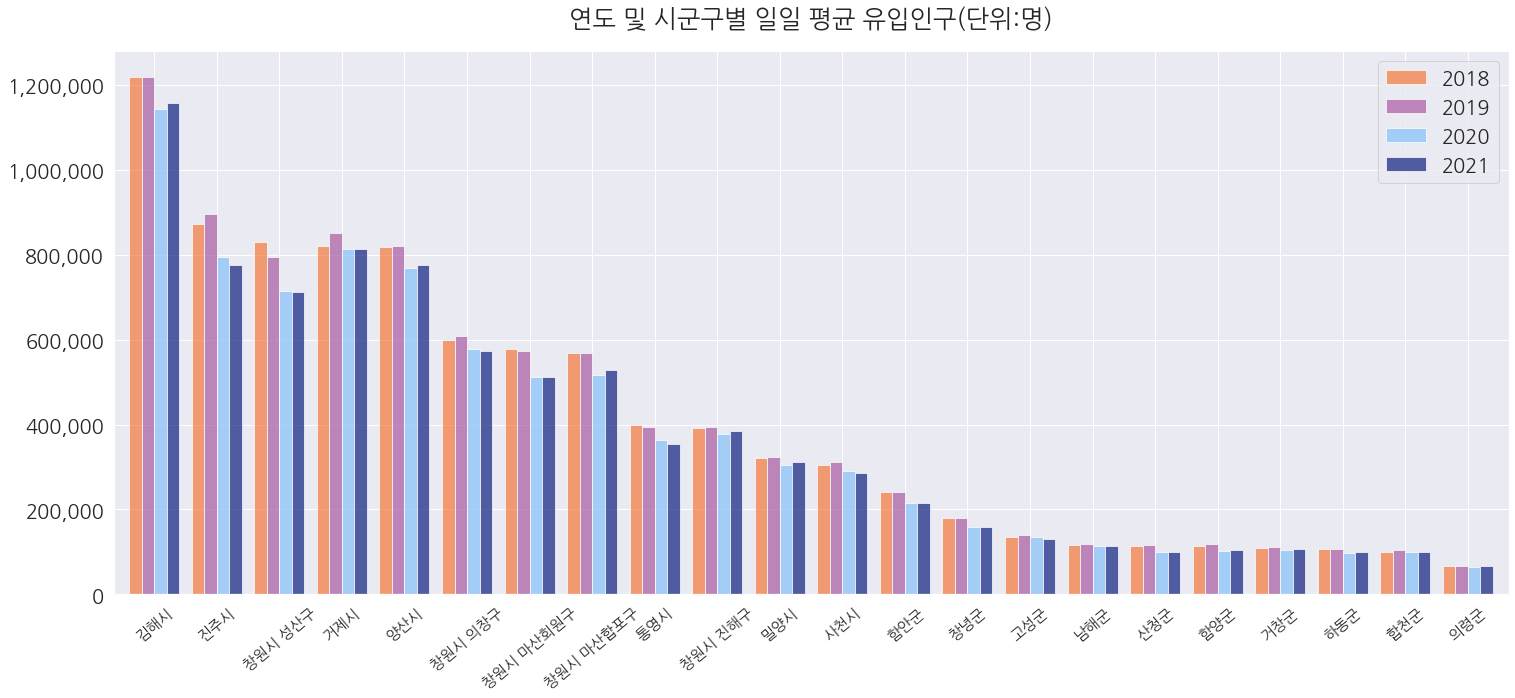

In [28]:
real_in_pivot.plot(kind = 'bar', figsize = (25,10), width = 0.8,alpha = 0.7,
                   color = ['#F5793A','#A95AA1','#85C0F9','#0F2080'])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('연도 및 시군구별 일일 평균 유입인구(단위:명)', fontsize = 25, pad = 25)
plt.xlabel('')
plt.xticks(rotation = 40, fontsize = 15)
plt.yticks(fontsize = 20)
plt.legend(prop = {'size' : 20})


plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_11584\2117330652.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


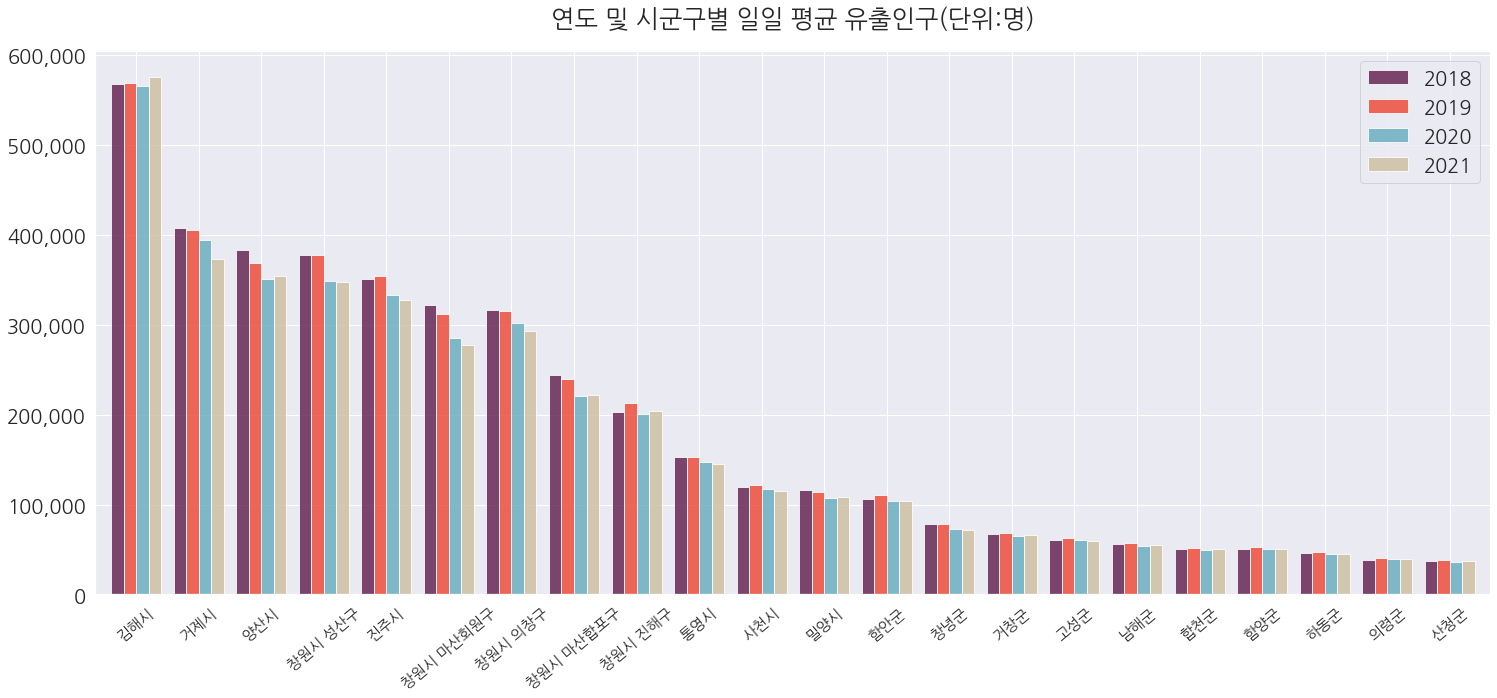

In [29]:
real_out_pivot.plot(kind = 'bar', figsize = (25,10), width = 0.8,alpha = 0.8,
                   color = ['#601A4A','#EE442F','#63ACBE','#CCBE9F'])


current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


plt.title('연도 및 시군구별 일일 평균 유출인구(단위:명)', fontsize = 25, pad = 25)
plt.xlabel('')
plt.xticks(rotation = 40, fontsize = 15)
plt.yticks(fontsize = 20)
plt.legend(prop = {'size' : 20})


plt.show()

In [30]:
df_combine_in_groupby_day_1['10대'] = df_combine_in_groupby_day_1[['남10대','여10대']].sum(axis = 1)
df_combine_in_groupby_day_1['20대 ~ 30대'] = df_combine_in_groupby_day_1[['남20대','남30대','여20대','여30대']].sum(axis = 1)
df_combine_in_groupby_day_1['40대 ~ 50대'] = df_combine_in_groupby_day_1[['남40대','남50대','여40대','여50대']].sum(axis = 1)
df_combine_in_groupby_day_1['60대 ~ 70대'] = df_combine_in_groupby_day_1[['남60대','남70대','여60대','여70대']].sum(axis = 1)

df_combine_out_groupby_day_1['10대'] = df_combine_out_groupby_day_1[['남10대','여10대']].sum(axis = 1)
df_combine_out_groupby_day_1['20대 ~ 30대'] = df_combine_out_groupby_day_1[['남20대','남30대','여20대','여30대']].sum(axis = 1)
df_combine_out_groupby_day_1['40대 ~ 50대'] = df_combine_out_groupby_day_1[['남40대','남50대','여40대','여50대']].sum(axis = 1)
df_combine_out_groupby_day_1['60대 ~ 70대'] = df_combine_out_groupby_day_1[['남60대','남70대','여60대','여70대']].sum(axis = 1)

df_combine_in_group = df_combine_in_groupby_day_1.groupby(['시군구'])[['10대','20대 ~ 30대','40대 ~ 50대','60대 ~ 70대','합계']].mean().reset_index()
df_combine_out_group = df_combine_out_groupby_day_1.groupby(['시군구'])[['10대','20대 ~ 30대','40대 ~ 50대','60대 ~ 70대','합계']].mean().reset_index()
display(df_combine_in_group.head())
display(df_combine_out_group.head())

,시군구,10대,20대 ~ 30대,40대 ~ 50대,60대 ~ 70대,합계
0,거제시,105448.85,209921.95,377679.64,128682.27,821732.70
1,거창군,9916.89,20045.28,48613.15,29536.36,108111.68
2,고성군,9661.71,26722.35,63207.25,35011.74,134603.04
3,김해시,104523.51,339168.68,526139.11,212106.45,1181937.76
4,남해군,9318.05,23650.31,51506.14,31184.06,115658.57


,시군구,10대,20대 ~ 30대,40대 ~ 50대,60대 ~ 70대,합계
0,거제시,55255.79,96759.80,178534.19,61787.94,392337.71
1,거창군,7971.55,12267.04,28418.02,18169.90,66826.51
2,고성군,5849.01,10591.68,25975.18,18666.85,61082.72
3,김해시,63114.73,159602.02,250426.51,97013.96,570157.21
4,남해군,5611.48,8829.96,23333.54,17822.43,55597.41


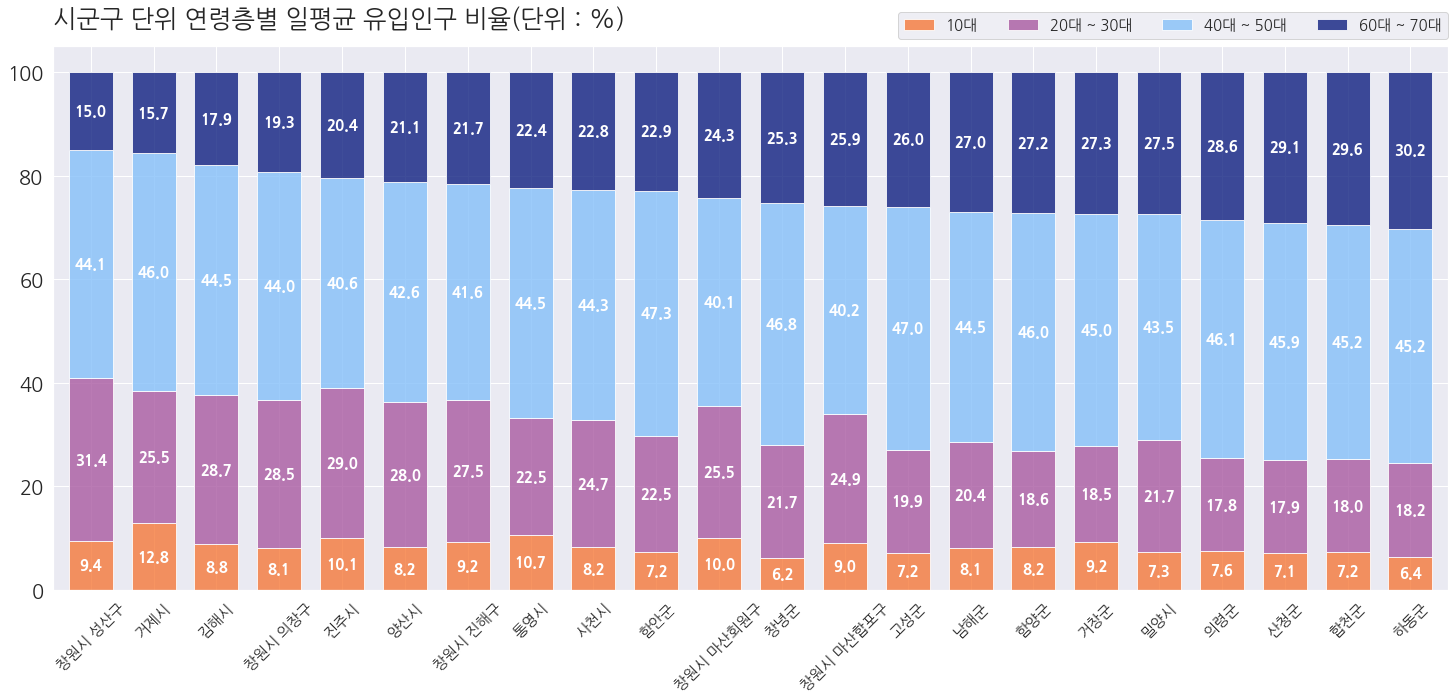

In [31]:
ax = df_combine_in_group.set_index('시군구')[['10대','20대 ~ 30대','40대 ~ 50대','60대 ~ 70대']].apply(lambda x : x*100/sum(x), axis = 1).sort_values(by = '60대 ~ 70대', ascending = True).plot(kind = 'bar', stacked = True,
                                                                                                                                                                                                 figsize = (25,10), width = 0.7, alpha = 0.8,
                                                                                                                                                                                                color = ['#F5793A','#A95AA1','#85C0F9','#0F2080'])

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = f'{height:.1f}' 
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center', color = 'white', size = 15, fontweight = 'bold')
    
    
plt.title('시군구 단위 연령층별 일평균 유입인구 비율(단위 : %)', fontsize = 25, pad = 20, loc = 'left')
plt.xlabel('')
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor =(0.6,1), prop = {'size' : 15}, loc = 'lower left', ncol = 4)


plt.show()

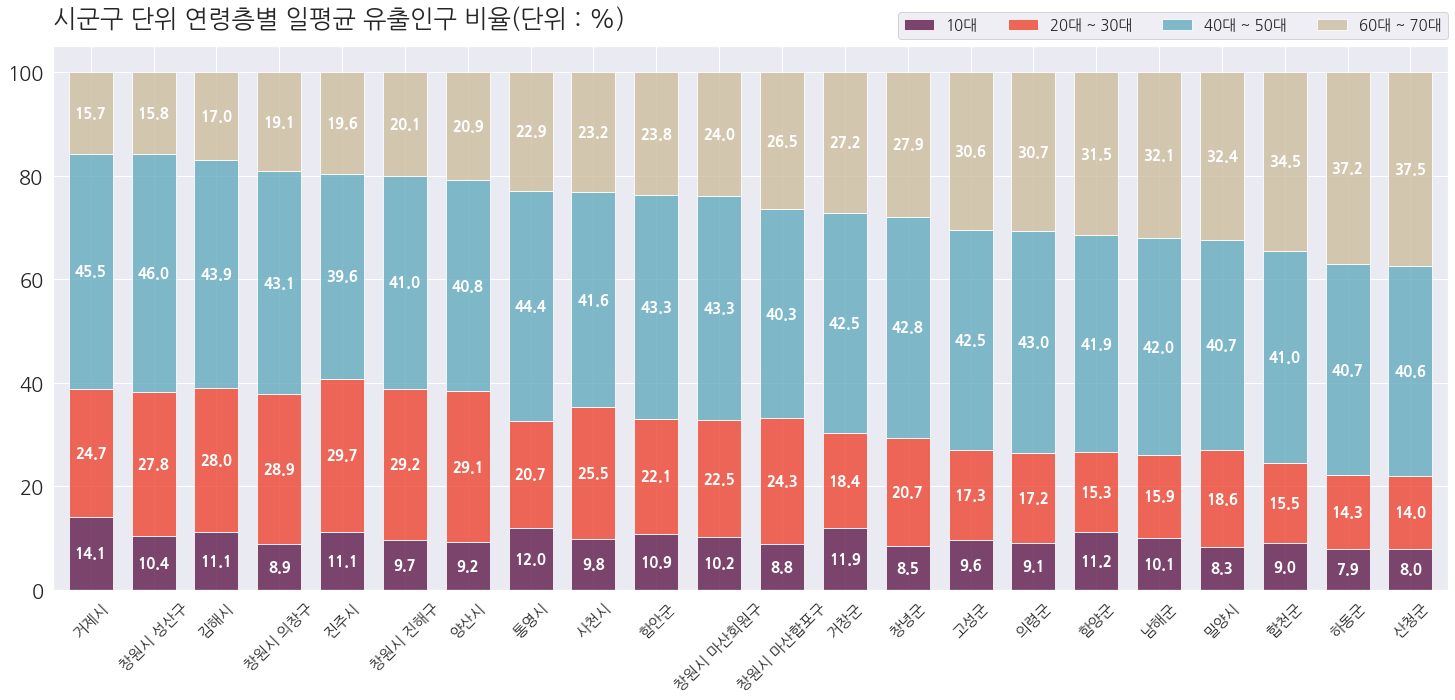

In [32]:
ax = df_combine_out_group.set_index('시군구')[['10대','20대 ~ 30대','40대 ~ 50대','60대 ~ 70대']].apply(lambda x : x*100/sum(x), axis = 1).sort_values(by = '60대 ~ 70대', ascending = True).plot(kind = 'bar', stacked = True,
                                                                                                                                                                                                figsize = (25,10), width = 0.7, alpha = 0.8,
                                                                                                                                                                                                color = ['#601A4A','#EE442F','#63ACBE','#CCBE9F'])

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = f'{height:.1f}' 
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center', color = 'white', size = 15, fontweight = 'bold')

    
    
plt.title('시군구 단위 연령층별 일평균 유출인구 비율(단위 : %)', fontsize = 25, pad = 20, loc = 'left')
plt.xlabel('')
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor =(0.6,1), prop = {'size' : 15}, loc = 'lower left', ncol = 4)



plt.show()

In [33]:
#시군구별 월 유출입인구 평균
 
 #시군구별 월 합계
df_combine_in_groupby_month_1 = df_combine_in.groupby(['연월','시군구']).sum().reset_index().sort_values(by = '연월')
df_combine_out_groupby_month_1 = df_combine_out.groupby(['연월','시군구']).sum().reset_index().sort_values(by = '연월')

df_combine_in_groupby_month_1['연'] = df_combine_in_groupby_month_1['연월'].dt.year
df_combine_in_groupby_month_1['월'] = df_combine_in_groupby_month_1['연월'].dt.month
df_combine_out_groupby_month_1['연'] = df_combine_out_groupby_month_1['연월'].dt.year
df_combine_out_groupby_month_1['월'] = df_combine_out_groupby_month_1['연월'].dt.month

display(df_combine_in_groupby_month_1.head(10))
display(df_combine_out_groupby_month_1.head(10))




df_combine_in_groupby_month_2 = df_combine_in_groupby_month_1.groupby(['시군구','연']).mean().reset_index().sort_values(by = '합계', ascending = False)
df_combine_out_groupby_month_2 = df_combine_out_groupby_month_1.groupby(['시군구','연']).mean().reset_index().sort_values(by = '합계', ascending = False)

display(df_combine_in_groupby_month_2.head(10))
display(df_combine_out_groupby_month_2.head(10))


,연월,시군구,연,월,남10대,남20대,남30대,남40대,남50대,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계
0,2018-01,거제시,2018,1,1661825.02,1375770.10,2553777.98,3406507.61,3017631.24,1528464.78,431202.56,1470889.60,1062395.79,1896119.69,2633126.63,2082366.77,1062642.83,435421.81,24618142.42
21,2018-01,합천군,2018,1,128195.65,109299.63,173784.61,300914.32,412292.23,282978.12,128966.36,103591.35,73500.80,125224.76,218125.98,271829.71,191429.47,119333.45,2639466.44
20,2018-01,함양군,2018,1,149601.01,152472.93,200624.92,372047.61,439786.15,261621.54,119574.03,131405.04,104005.39,142974.63,261960.29,303427.88,207455.28,126431.45,2973388.16
19,2018-01,함안군,2018,1,294240.39,416925.02,607162.00,957403.16,1096429.68,609015.38,189461.76,246374.19,228857.51,346407.30,584085.19,622235.33,368082.74,179528.06,6746207.70
18,2018-01,하동군,2018,1,95864.46,124294.72,172200.61,328994.34,411087.77,263744.82,120336.09,86002.38,76918.63,122083.78,206450.09,270749.85,209116.37,125048.28,2612892.17
17,2018-01,통영시,2018,1,685600.18,620239.14,957621.90,1437444.24,1506564.92,922214.90,331154.51,590927.54,487509.81,773800.09,1178285.14,1181016.02,765983.36,324170.35,11762532.09
16,2018-01,창원시 진해구,2018,1,598460.92,798509.57,1109278.79,1392528.50,1425470.26,999140.66,366154.48,501358.39,528978.20,844058.90,1032081.64,1084718.84,741467.63,360429.79,11782636.57
14,2018-01,창원시 성산구,2018,1,1390841.58,2321124.76,2454540.62,2934758.94,3456429.43,1525758.87,410022.40,1205707.23,1727971.40,1669274.54,2480394.11,2552902.88,1022647.88,464741.46,25617116.11
13,2018-01,창원시 마산회원구,2018,1,888665.36,1184270.69,1313936.86,1765474.54,2069430.71,1482053.92,556123.48,821254.21,983964.57,1076013.49,1513952.65,1707355.53,1220197.80,590089.55,17172783.35
12,2018-01,창원시 마산합포구,2018,1,802265.00,1123496.17,1298819.15,1648517.76,2065523.14,1553255.90,605951.14,726407.58,894902.20,1066013.28,1479989.54,1795540.55,1313924.24,645772.91,17020378.56


,연월,시군구,연,월,남10대,남20대,남30대,남40대,남50대,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계
0,2018-01,거제시,2018,1,901647.23,627288.09,1354266.84,1675461.50,1483610.70,729633.89,225982.42,818083.17,474703.88,1012014.19,1357024.61,1073757.84,573735.24,254941.24,12562150.83
21,2018-01,합천군,2018,1,88707.18,53055.41,77066.33,141219.05,210775.89,169316.12,86550.19,73946.37,37149.28,72590.00,128284.00,162046.29,124869.98,83488.09,1509064.18
20,2018-01,함양군,2018,1,95390.45,47161.89,69692.08,155044.57,192939.44,138962.01,79584.32,88338.69,40720.67,76060.56,138753.54,152407.87,129736.34,90020.58,1494813.00
19,2018-01,함안군,2018,1,194255.43,177409.55,252220.82,405037.52,428241.50,279713.56,101197.08,172168.85,109081.49,207424.79,318176.97,310885.63,203139.34,102203.42,3261155.94
18,2018-01,하동군,2018,1,53766.20,46102.56,69157.21,141279.62,191173.81,154326.92,79893.33,54102.92,30691.95,64186.46,106508.91,147191.17,142461.36,91658.69,1372501.11
17,2018-01,통영시,2018,1,294556.44,194881.22,380923.17,595999.65,547204.98,334851.07,132599.06,265391.58,162951.95,329101.56,478320.53,462199.25,312849.95,137557.44,4629387.85
16,2018-01,창원시 진해구,2018,1,322207.37,360460.49,660640.60,757916.57,688172.91,464890.06,184284.37,291580.29,274497.48,514385.81,565916.34,543376.35,371618.10,187210.43,6187157.18
14,2018-01,창원시 성산구,2018,1,674965.49,833882.15,901969.61,1202325.28,1596126.72,679770.55,193280.84,568023.25,661607.79,748735.83,1268982.59,1309473.18,502687.21,218967.83,11360798.31
13,2018-01,창원시 마산회원구,2018,1,522155.36,517628.67,717883.60,1083612.66,1228710.92,800067.40,316375.62,483025.38,487351.39,612368.89,960190.71,984675.91,684045.67,340442.41,9738534.60
12,2018-01,창원시 마산합포구,2018,1,352126.86,438094.34,599914.99,725438.55,900181.52,664057.06,271762.95,323322.03,370081.23,491187.89,633883.59,779668.34,577985.73,297904.00,7425609.08


,시군구,연,월,남10대,남20대,남30대,남40대,남50대,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계
16,김해시,2019,6.50,1736765.99,2565122.73,3484321.66,4466124.19,4955351.81,2628241.94,933965.89,1608090.02,2015516.88,2580956.81,3549026.22,3568750.31,1967987.93,1015757.22,37075979.60
15,김해시,2018,6.50,1782212.22,2679676.39,3499089.03,4541729.99,4983268.56,2558680.94,910740.42,1622812.20,1987209.19,2539729.88,3573110.39,3466812.08,1920632.29,996946.82,37062650.40
18,김해시,2021,6.50,1591433.01,2516097.69,3309492.56,4201470.44,4757813.87,2623945.98,899615.41,1481296.05,1970408.06,2362070.87,3247840.69,3470705.70,1884196.03,908574.17,35224960.56
17,김해시,2020,6.50,1598171.07,2468413.73,3303488.82,4214981.01,4712716.98,2530704.64,876390.00,1453388.81,1955229.01,2380631.46,3253615.01,3405810.77,1818982.80,910272.73,34882796.83
19,김해시,2022,3.00,1438278.05,2450747.65,2975267.93,3894492.32,4721120.49,3195437.46,1037105.97,1362094.93,1914409.07,2125666.63,3058126.20,3467603.37,2250245.54,974807.10,34865402.72
51,진주시,2019,6.50,1450796.31,2149298.44,2146832.77,2837807.04,3216062.08,2106797.83,937912.37,1316089.87,1759962.11,1847152.00,2505112.00,2512678.24,1604583.56,830734.07,27221818.68
50,진주시,2018,6.50,1446814.71,2158516.68,2151047.93,2855559.66,3131753.04,1899470.81,824955.67,1306202.66,1680665.61,1818813.28,2476008.84,2450130.29,1546790.12,804788.59,26551517.88
1,거제시,2019,6.50,1744930.52,1281857.88,2416565.42,3533608.84,3152742.77,1686096.28,508865.74,1595255.92,1050486.78,2000787.96,2880977.81,2300731.26,1237280.02,493202.61,25883389.79
70,창원시 성산구,2018,6.50,1363239.32,2213488.46,2405009.51,2833124.94,3390884.07,1571507.24,424696.72,1138874.24,1701023.55,1704240.99,2449035.40,2574684.34,1046086.13,442045.75,25257940.67
41,양산시,2019,6.50,1103464.13,1621643.04,2319793.78,2793067.93,3115145.48,1871874.68,842521.49,989514.06,1329074.43,1779241.26,2274831.94,2435841.84,1609178.47,903954.80,24989147.33


,시군구,연,월,남10대,남20대,남30대,남40대,남50대,남60대,남70대,여10대,여20대,여30대,여40대,여50대,여60대,여70대,합계
18,김해시,2021,6.50,1001483.63,1166829.59,1565085.20,2062718.26,2142293.53,1095487.57,435788.58,932166.87,970962.18,1235616.44,1745117.58,1714451.82,932173.13,512598.11,17512772.50
19,김해시,2022,3.00,915056.15,1157985.64,1404006.23,1927603.09,2164687.29,1337193.85,497027.13,873016.69,964800.04,1111116.00,1673358.15,1751153.10,1124700.40,562854.59,17464558.36
16,김해시,2019,6.50,996744.06,1075323.13,1545556.11,2092148.04,2109105.89,1050295.80,416541.95,934486.65,916573.98,1278028.44,1799096.60,1663369.65,920667.50,508096.32,17306034.12
15,김해시,2018,6.50,1013535.81,1108942.87,1560303.74,2122839.66,2102054.74,1023367.71,403804.88,935282.42,921793.78,1261154.54,1802820.97,1609023.94,896588.59,488631.85,17250145.49
17,김해시,2020,6.50,1000826.09,1120998.45,1568867.26,2058179.65,2086945.14,1055836.13,422999.04,918855.92,950927.63,1260446.31,1739230.79,1659230.54,896063.12,505861.72,17245267.78
0,거제시,2018,6.50,906497.22,589042.88,1265678.41,1647683.33,1467321.55,733998.78,233950.63,803045.31,467768.82,994513.89,1361503.64,1083519.16,588534.03,251966.58,12395024.25
1,거제시,2019,6.50,909129.85,550643.71,1179295.01,1680099.71,1479668.11,750553.58,244690.98,807926.62,440672.38,955188.70,1375976.61,1102336.35,605620.49,257036.43,12338838.56
2,거제시,2020,6.50,893834.29,593796.95,1087443.85,1627769.95,1458895.47,744429.01,246833.75,790146.90,451886.92,869907.95,1324342.73,1064700.61,596656.09,257794.42,12008438.89
40,양산시,2018,6.50,574032.98,723240.93,1133482.60,1269073.60,1307099.93,768172.23,387948.28,511658.85,656439.13,951665.72,1093616.71,1065829.13,736430.41,462150.76,11640841.25
70,창원시 성산구,2018,6.50,653880.06,854008.24,919020.22,1175482.13,1608495.02,699798.10,196424.64,557959.74,701964.86,760286.10,1253645.12,1362329.69,513104.41,217233.93,11473632.26


In [34]:
month_pivot_in = df_combine_in_groupby_month_2[['연','시군구','합계']]
month_pivot_out = df_combine_out_groupby_month_2[['연','시군구','합계']]

month_pivot_in.drop(month_pivot_in.loc[month_pivot_in['연'] == 2022].index, inplace = True)
month_pivot_out.drop(month_pivot_out.loc[month_pivot_out['연'] == 2022].index, inplace = True)

real_in_pivot_month = month_pivot_in.pivot(index = '시군구', columns = '연', values = '합계').sort_values(by = [2018,2019,2020,2021], ascending = False)
real_out_pivot_month = month_pivot_out.pivot(index = '시군구', columns = '연', values = '합계').sort_values(by = [2018,2019,2020,2021], ascending = False)

C:\Users\user\AppData\Local\Temp\ipykernel_11584\801465334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_pivot_in.drop(month_pivot_in.loc[month_pivot_in['연'] == 2022].index, inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_11584\801465334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_pivot_out.drop(month_pivot_out.loc[month_pivot_out['연'] == 2022].index, inplace = True)


C:\Users\user\AppData\Local\Temp\ipykernel_11584\331384980.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


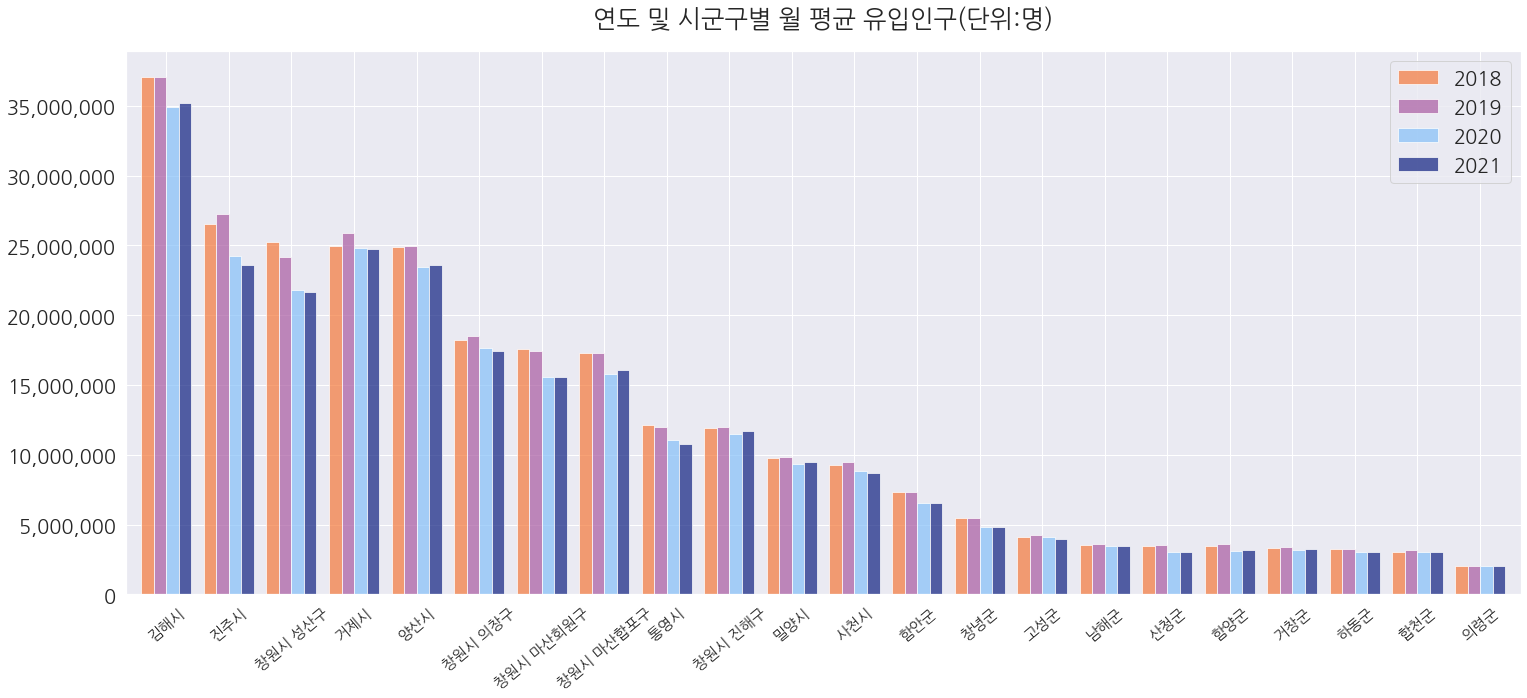

In [35]:
real_in_pivot_month.plot(kind = 'bar', figsize = (25,10), width = 0.8,alpha = 0.7,
                            color = ['#F5793A','#A95AA1','#85C0F9','#0F2080'])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('연도 및 시군구별 월 평균 유입인구(단위:명)', fontsize = 25, pad = 25)
plt.xlabel('')
plt.xticks(rotation = 40, fontsize = 15)
plt.yticks(fontsize = 20)
plt.legend(prop = {'size' : 20})


plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11584\1930238454.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


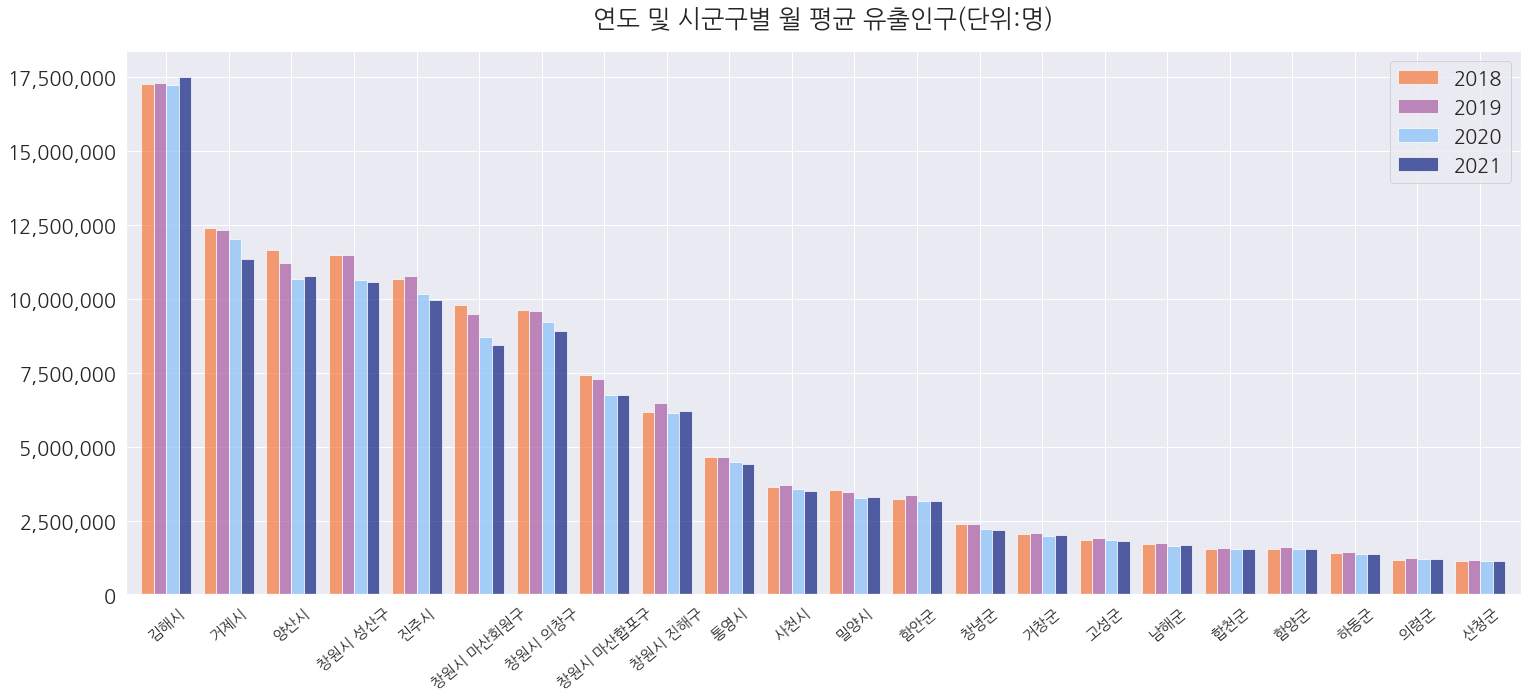

In [36]:
real_out_pivot_month.plot(kind = 'bar', figsize = (25,10), width = 0.8,alpha = 0.7,
                            color = ['#F5793A','#A95AA1','#85C0F9','#0F2080'])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('연도 및 시군구별 월 평균 유출인구(단위:명)', fontsize = 25, pad = 25)
plt.xlabel('')
plt.xticks(rotation = 40, fontsize = 15)
plt.yticks(fontsize = 20)
plt.legend(prop = {'size' : 20})


plt.show()

In [37]:
df_combine_in_groupby_month_1['10대'] = df_combine_in_groupby_month_1[['남10대','여10대']].sum(axis = 1)
df_combine_in_groupby_month_1['20대 ~ 30대'] = df_combine_in_groupby_month_1[['남20대','남30대','여20대','여30대']].sum(axis = 1)
df_combine_in_groupby_month_1['40대 ~ 50대'] = df_combine_in_groupby_month_1[['남40대','남50대','여40대','여50대']].sum(axis = 1)
df_combine_in_groupby_month_1['60대 ~ 70대'] = df_combine_in_groupby_month_1[['남60대','남70대','여60대','여70대']].sum(axis = 1)

df_combine_out_groupby_month_1['10대'] = df_combine_out_groupby_month_1[['남10대','여10대']].sum(axis = 1)
df_combine_out_groupby_month_1['20대 ~ 30대'] = df_combine_out_groupby_month_1[['남20대','남30대','여20대','여30대']].sum(axis = 1)
df_combine_out_groupby_month_1['40대 ~ 50대'] = df_combine_out_groupby_month_1[['남40대','남50대','여40대','여50대']].sum(axis = 1)
df_combine_out_groupby_month_1['60대 ~ 70대'] = df_combine_out_groupby_month_1[['남60대','남70대','여60대','여70대']].sum(axis = 1)

df_combine_in_group_month = df_combine_in_groupby_month_1.groupby(['시군구'])[['10대','20대 ~ 30대','40대 ~ 50대','60대 ~ 70대','합계']].mean().reset_index()
df_combine_out_group_month = df_combine_out_groupby_month_1.groupby(['시군구'])[['10대','20대 ~ 30대','40대 ~ 50대','60대 ~ 70대','합계']].mean().reset_index()
display(df_combine_in_group_month.head())
display(df_combine_out_group_month.head())

,시군구,10대,20대 ~ 30대,40대 ~ 50대,60대 ~ 70대,합계
0,거제시,3207236.66,6384795.84,11487161.79,3913883.37,24993077.66
1,거창군,301623.10,609679.06,1478573.55,898351.17,3288226.88
2,고성군,293861.72,812762.66,1922454.34,1064885.37,4093964.09
3,김해시,3179092.40,10315847.43,16002570.72,6451237.79,35948748.34
4,남해군,283409.51,719326.43,1566564.13,948466.25,3517766.32


,시군구,10대,20대 ~ 30대,40대 ~ 50대,60대 ~ 70대,합계
0,거제시,1680610.02,2942958.33,5430134.18,1879286.02,11932988.55
1,거창군,242455.49,373103.24,864336.65,552639.14,2032534.51
2,고성군,177898.16,322146.91,790037.47,567754.04,1857836.58
3,김해시,1919640.41,4854310.48,7616745.84,2950688.75,17341385.48
4,남해군,170673.79,268564.11,709691.89,542070.74,1691000.52


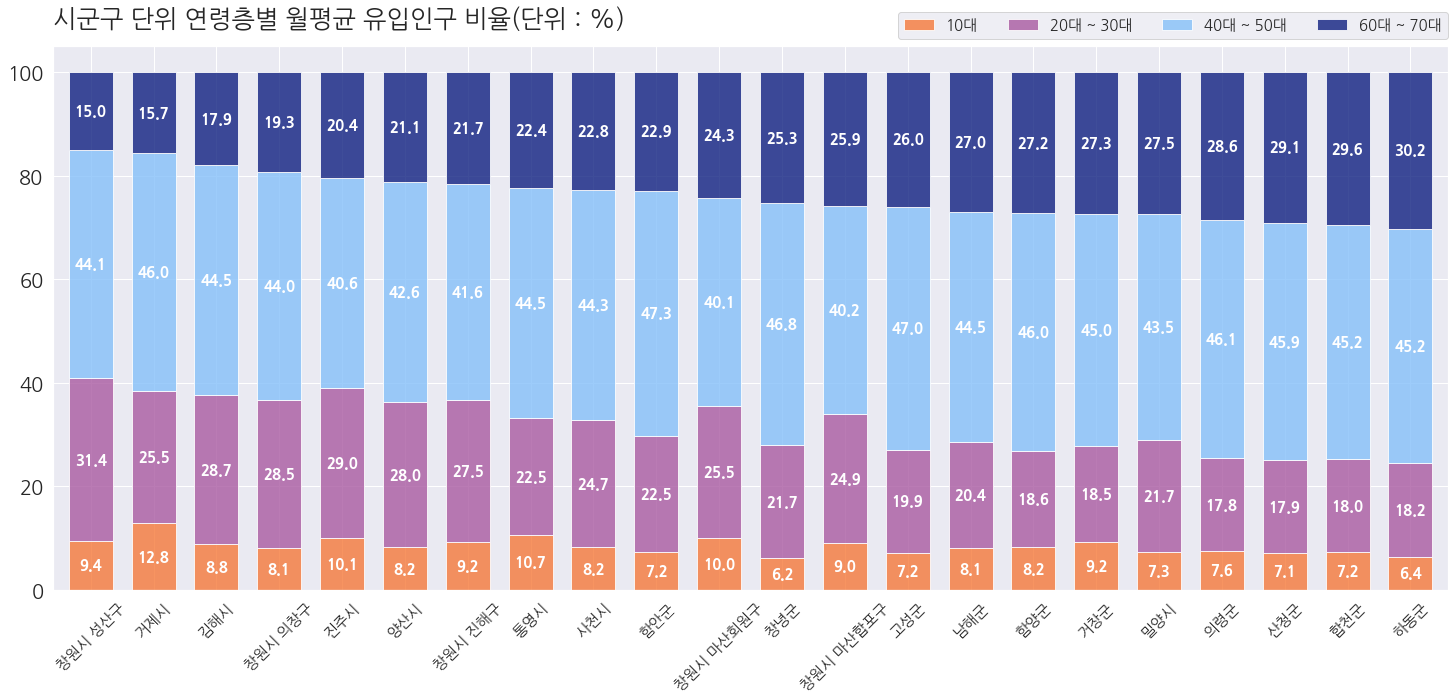

In [38]:
ax = df_combine_in_group_month.set_index('시군구')[['10대','20대 ~ 30대','40대 ~ 50대','60대 ~ 70대']].apply(lambda x : x*100/sum(x), axis = 1).sort_values(by = '60대 ~ 70대', ascending = True).plot(kind = 'bar', stacked = True,
                                                                                                                                                                                                         figsize = (25,10), width = 0.7, alpha = 0.8,
                                                                                                                                                                                                        color = ['#F5793A','#A95AA1','#85C0F9','#0F2080'])

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = f'{height:.1f}' 
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center', color = 'white', size = 15, fontweight = 'bold')
    
    
plt.title('시군구 단위 연령층별 월평균 유입인구 비율(단위 : %)', fontsize = 25, pad = 20, loc = 'left')
plt.xlabel('')
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor =(0.6,1), prop = {'size' : 15}, loc = 'lower left', ncol = 4)


plt.show()

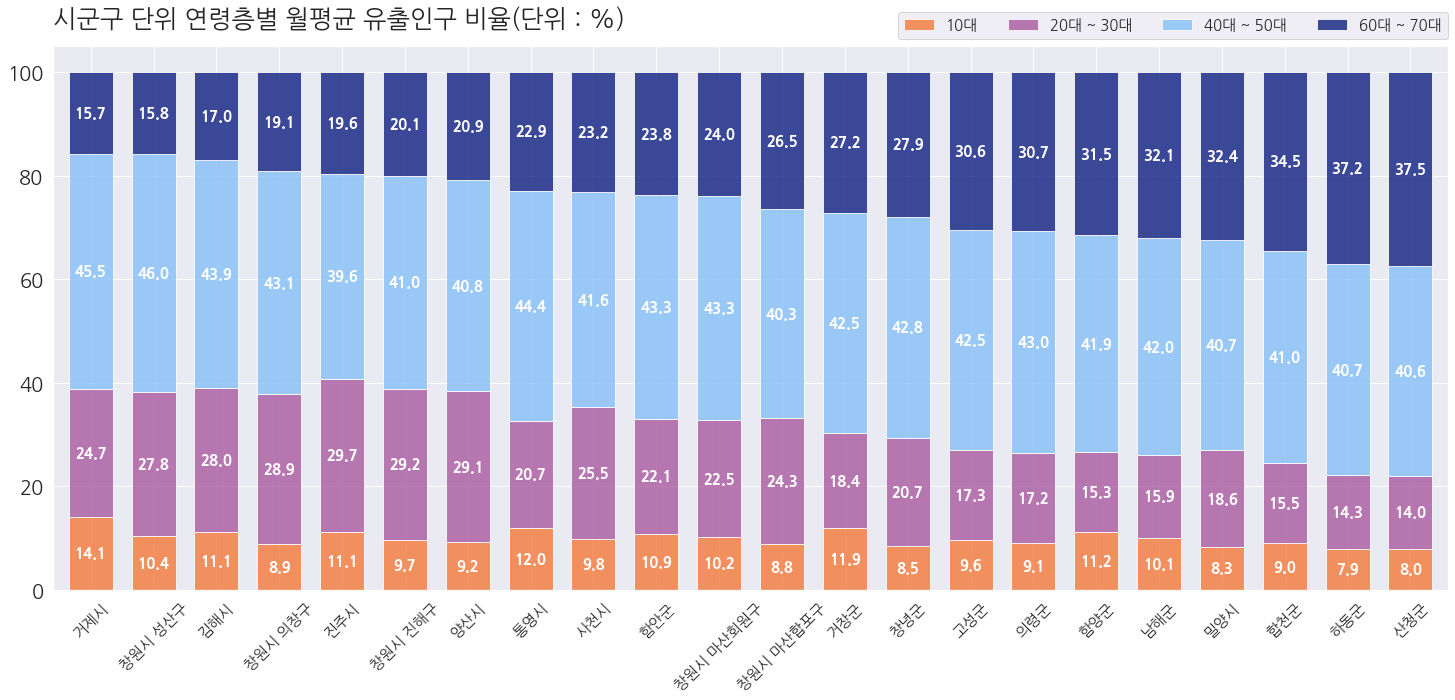

In [39]:
ax = df_combine_out_group_month.set_index('시군구')[['10대','20대 ~ 30대','40대 ~ 50대','60대 ~ 70대']].apply(lambda x : x*100/sum(x), axis = 1).sort_values(by = '60대 ~ 70대', ascending = True).plot(kind = 'bar', stacked = True,
                                                                                                                                                                                                         figsize = (25,10), width = 0.7, alpha = 0.8,
                                                                                                                                                                                                        color = ['#F5793A','#A95AA1','#85C0F9','#0F2080'])

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = f'{height:.1f}' 
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center', color = 'white', size = 15, fontweight = 'bold')
    
    
plt.title('시군구 단위 연령층별 월평균 유출인구 비율(단위 : %)', fontsize = 25, pad = 20, loc = 'left')
plt.xlabel('')
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor =(0.6,1), prop = {'size' : 15}, loc = 'lower left', ncol = 4)


plt.show()